<a href="https://colab.research.google.com/github/jcms2665/SAE/blob/master/geospatialSAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTIMACIÓN DE LAS SUBPOBLACIONES EN ÁREAS PEQUEÑAS

El objetivo de esta hoja de trabajo es mostrar el análisis estadístico y espacial de la zona de interés para el estudio de las subpoblaciones.

Para desarrollar este ejercicio se utiliza R para hacer los estadísticos y Python para la parte espacial, ya que este último permite hacer el vínculo con Google Earh Engine.

In [ ]:
#@title Instalación de librerías {display-mode: "form"}
!pip install earthengine-api
!pip install folium
!pip install geehydro
!pip install pyshp
!pip install geopandas
!pip install PyDrive
!pip install -U pip
!pip install GDAL-1.11.2-cp27-none-win32.whl
!pip install rasterio-0.24.0-cp27-none-win32.whl


In [11]:
#@title Paquetes a utilizar en el análisis {display-mode: "form"}
import ee 
import folium
import geehydro
from datetime import datetime as dt
from IPython.display import Image
import shapefile
import geopandas as gpd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
%load_ext rpy2.ipython

In [10]:
#@title Permisos para entrar a GoogleEarthEngine y Drive {display-mode: "form"}

#Permiso para entrar a la cuenta
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


download = drive.CreateFile({'id': '1HpvFFv2p1cjbKYKb7NcWb3gH-UKrNebG'})
download.GetContentFile('ZM_ageb.zip')
zip_ref = zipfile.ZipFile('ZM_ageb.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
zm_mun=shapefile.Reader("ZM_ageb.shp")
#crop_extent = gpd.read_file(zm_mun)
#zm_mun.head()

In [ ]:
l8 = ee.ImageCollection("LANDSAT/LC08/C01/T1_TOA")

In [ ]:
parameters = {'min': 0.04455690331098153,
              'max': 0.22198169218998673,
              'gamma': 1,
              'bands': ['B4', 'B3', 'B2'],
              'opacity': 1}
             


In [ ]:

acopilco = ee.Image(l8.filterMetadata("CLOUD_COVER","less_than",1).mean())

Ituna_map = folium.Map(location=[19.660904,-99.0386764], zoom_start=8)
Ituna_map.addLayer(acopilco, parameters)
#Ituna_map.addLayer(gdf)
Ituna_map




In [ ]:
import fiona
import rasterio
import rasterio.mask

with fiona.open("ZM_ageb.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

ModuleNotFoundError: ignored

In [ ]:
import geopandas as gpd
gdf = gpd.read_file("ZM_ageb.shp")
print (gdf)


    CVE_ENT CVE_MUN CVE_AGEB                                           geometry
0        09     004    015-7  POLYGON ((-99.32299 19.34705, -99.32286 19.346...
1        09     004    033-5  POLYGON ((-99.30096 19.37177, -99.30094 19.371...
2        09     008    036-8  POLYGON ((-99.26775 19.30114, -99.26750 19.301...
3        09     009    010-0  POLYGON ((-99.00071 19.22425, -99.00094 19.223...
4        09     009    011-5  POLYGON ((-99.07765 19.11642, -99.07733 19.116...
..      ...     ...      ...                                                ...
440      15     124    004-2  POLYGON ((-100.16394 19.71361, -100.16383 19.7...
441      15     124    005-7  POLYGON ((-100.07928 19.76413, -100.07914 19.7...
442      15     124    006-1  POLYGON ((-100.12394 19.61669, -100.12394 19.6...
443      15     124    007-6  POLYGON ((-100.09890 19.64334, -100.09854 19.6...
444      15     125    003-5  POLYGON ((-99.05263 19.69861, -99.05157 19.698...

[445 rows x 4 columns]


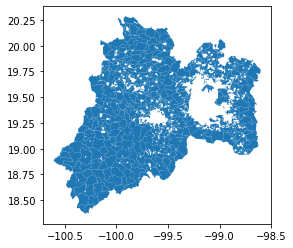

In [ ]:
%matplotlib inline
gdf.plot()

KeyError: ignored

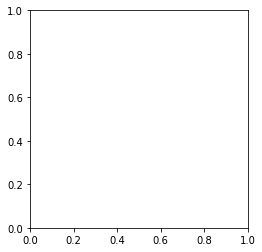

In [ ]:
#Para hacer mapas temáticos
gdf.plot(column='LUCODE', cmap=None)